In [44]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
from src.graph import GraphModel 
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle
import os

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
path = '../data/connectomes/'
connectomes = os.listdir(path)
connectomes

['rattus.norvegicus_brain_1.graphml',
 'rhesus_brain_1.graphml',
 'mouse_brain_1.graphml']

In [46]:
nx.read_graphml

<function networkx.readwrite.graphml.read_graphml(path, node_type=<class 'str'>, edge_key_type=<class 'int'>, force_multigraph=False, *, backend=None, **backend_kwargs)>

# Mouse Brain

In [69]:
extension = 'graphml'
name = 'mouse_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/mouse_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_31758/4171854464.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [70]:
est = estimator.LogitRegEstimator2(g)
params, pvalues = est.estimate_parameters()
sigma, alpha, beta = params

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22731
Model:                          Logit   Df Residuals:                    22728
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.1221
Time:                        14:18:14   Log-Likelihood:                -11934.
converged:                       True   LL-Null:                       -13594.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7895      0.147    -46.315      0.000      -7.077      -6.502
x1             0.0261      0.001     39.019      0.000       0.025       0.027
x2             0.0255      0.001     40.154      0.0

In [71]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 30

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [72]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2


In [ ]:
g_est = graphs[-1]
s_est = spec[-1]

## Visualizations

In [ ]:
ut = utils.GraphUtils()

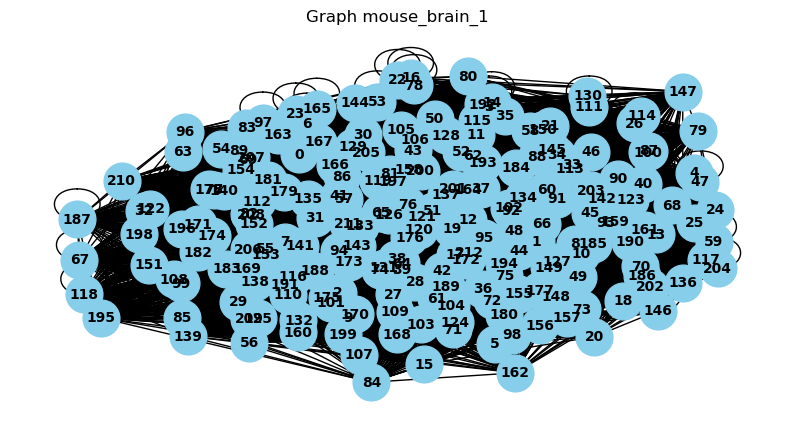

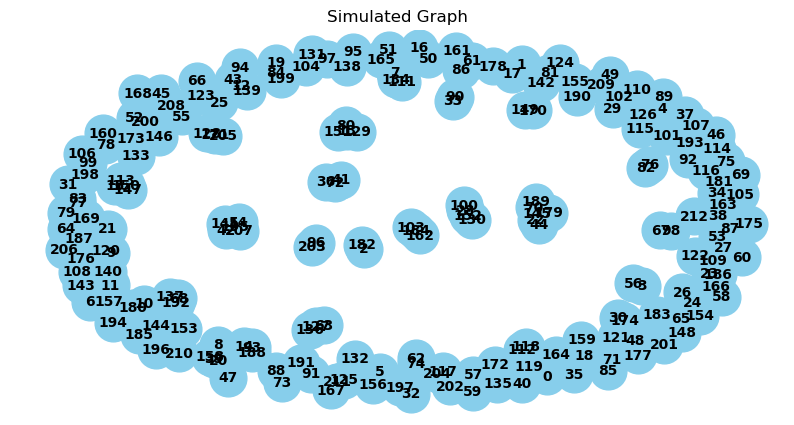

In [ ]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


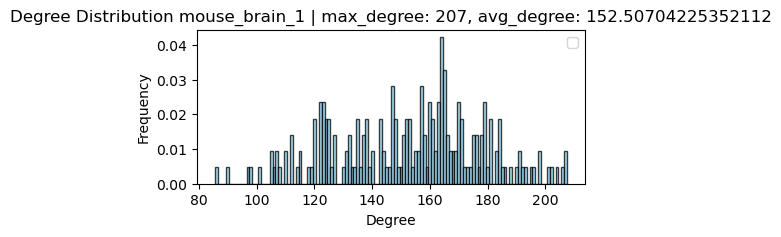

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


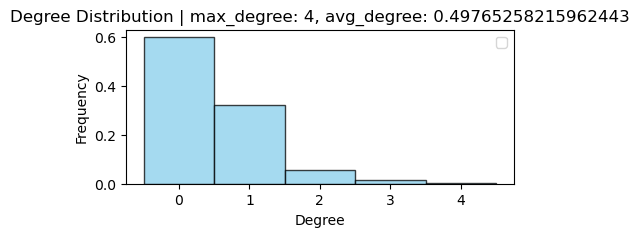

In [ ]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

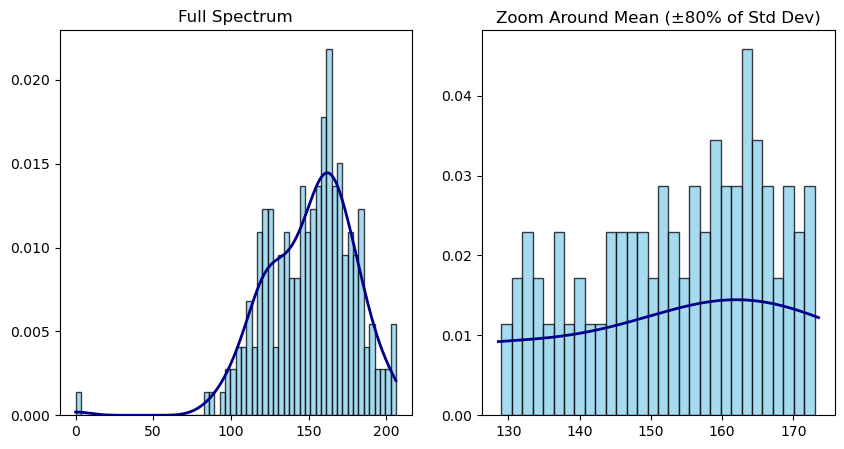

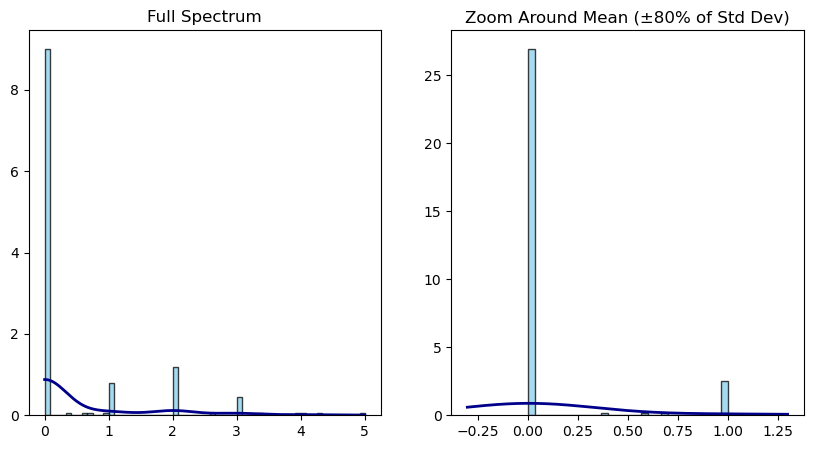

In [ ]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model Selection

In [ ]:
import src.model_selection as ms 
real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


for: mouse_brain_1
The best model is: WS
Model scores:
ER: 5.787001429835864
WS: 5.353121619058753
BA: 6.395551057353173
LG: 12.191266933109734


# Rhesus Brain

In [ ]:
extension = 'graphml'
name = 'rhesus_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/rhesus_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_31758/3919072262.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [ ]:
est = estimator.LogitRegEstimator2(g)
params, pvalues = est.estimate_parameters()
sigma, alpha, beta = params

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                29161
Model:                          Logit   Df Residuals:                    29158
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.1695
Time:                        14:12:26   Log-Likelihood:                -8122.0
converged:                       True   LL-Null:                       -9779.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6422      0.058    -79.904      0.000      -4.756      -4.528
x1             0.0443      0.001     45.044      0.000       0.042       0.046
x2             0.0364      0.001     34.017      0.0

In [ ]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 30

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [ ]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
KS Statistic: 0.07024793388429752
KS Statistic: 0.05785123966942149
KS Statistic: 0.10330578512396695
KS Statistic: 0.045454545454545456
Degree Distribution Stable: True
Graph Converged: True






In [ ]:
g_est = graphs[-1]
s_est = spec[-1]

## Visualizations

In [ ]:
ut = utils.GraphUtils()

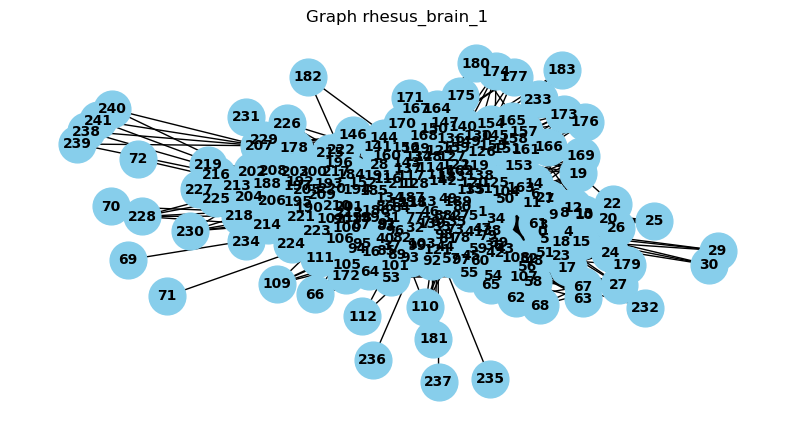

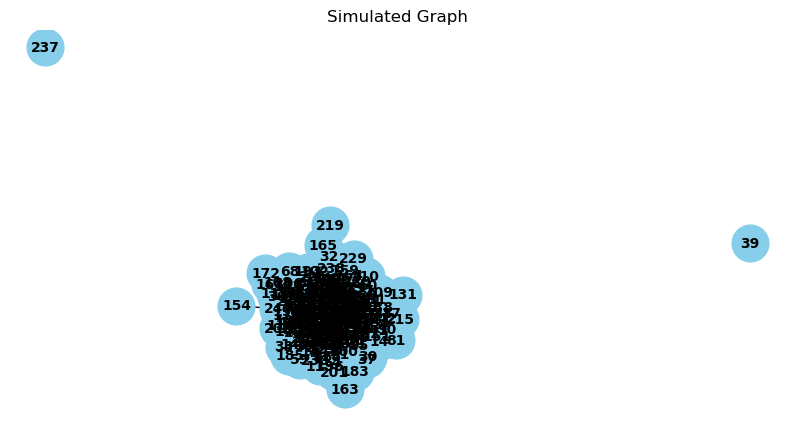

In [ ]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


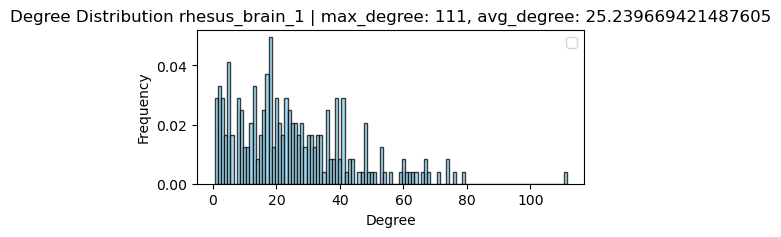

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


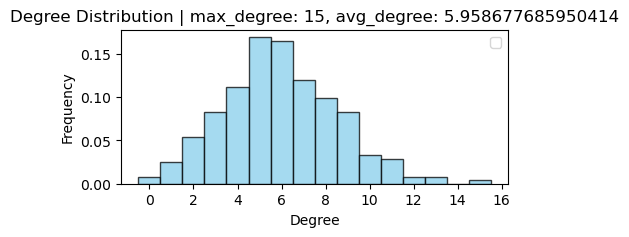

In [ ]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

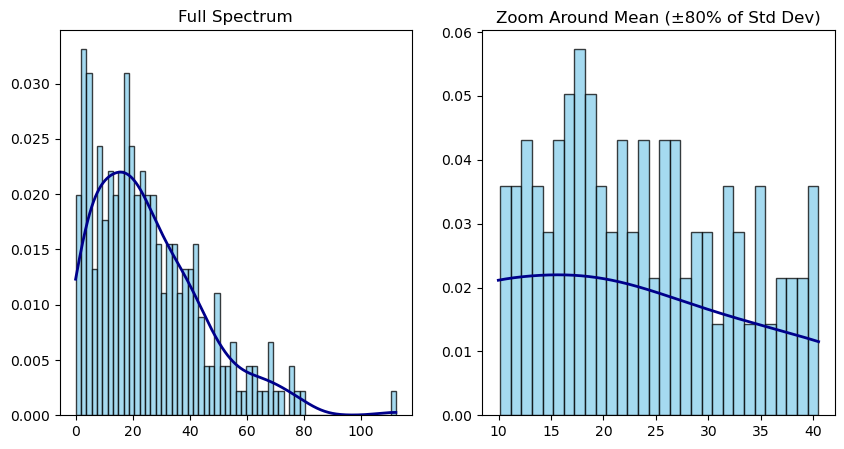

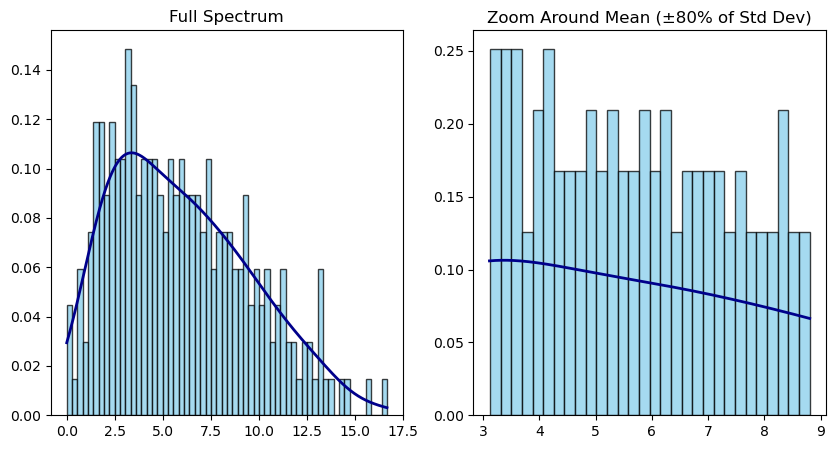

In [ ]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model selection

In [ ]:
import src.model_selection as ms 
real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


for: rhesus_brain_1
The best model is: ER
Model scores:
ER: 9.789518445087483
WS: 12.345810669222367
BA: 12.192807604258112
LG: 14.362336092563943


# Rattus norvegicus

In [ ]:
extension = 'graphml'
name = 'rattus.norvegicus_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/rattus.norvegicus_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_31758/2364455897.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [ ]:
est = estimator.LogitRegEstimator2(g)
params, pvalues = est.estimate_parameters()
sigma, alpha, beta = params

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               126253
Model:                          Logit   Df Residuals:                   126250
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.7385
Time:                        13:46:53   Log-Likelihood:                -15684.
converged:                       True   LL-Null:                       -59974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8765      0.031   -186.786      0.000      -5.938      -5.815
x1             0.0160   9.82e-05    162.780      0.000       0.016       0.016
x2             0.0177      0.000    128.636      0.0

In [ ]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 30

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [ ]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
KS Statistic: 0.02584493041749503
KS Statistic: 0.005964214711729622
KS Statistic: 0.011928429423459244
KS Statistic: 0.02385685884691849
Degree Distribution Stable: True
Graph Converged: True






In [ ]:
g_est = graphs[-1]
s_est = spec[-1]

## Visualizations

In [ ]:
ut = utils.GraphUtils()

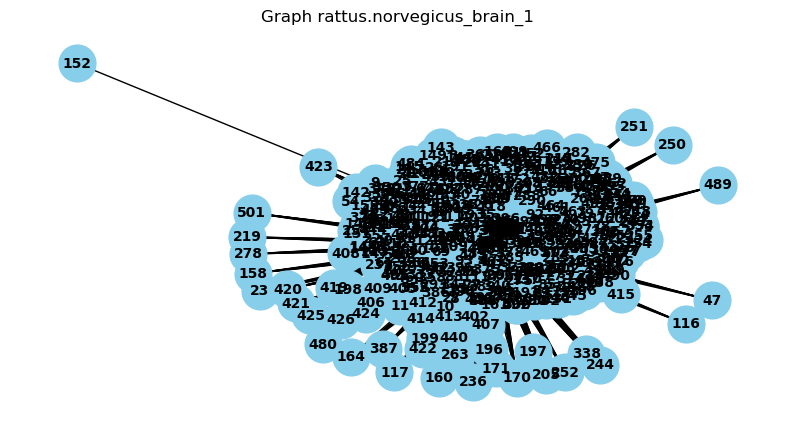

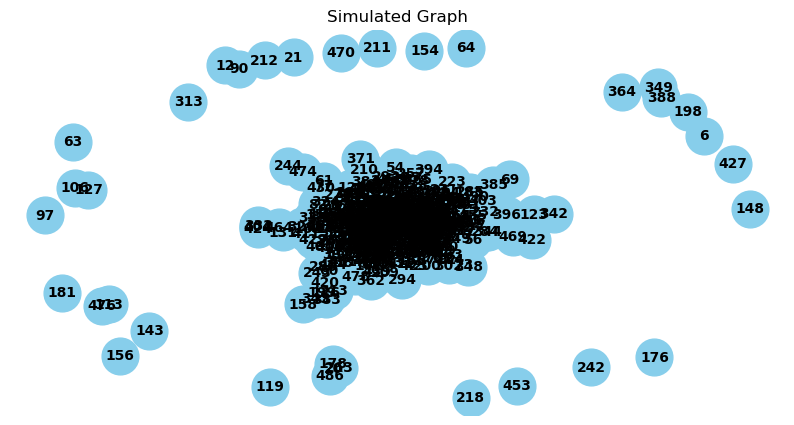

In [ ]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


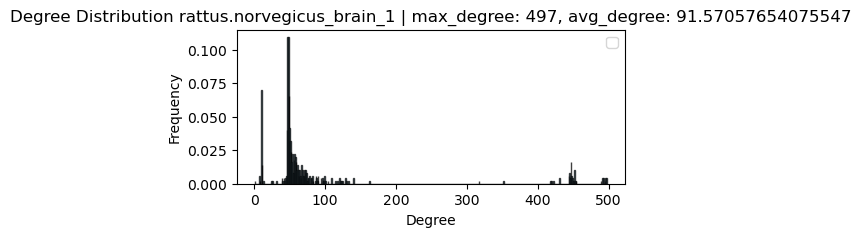

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


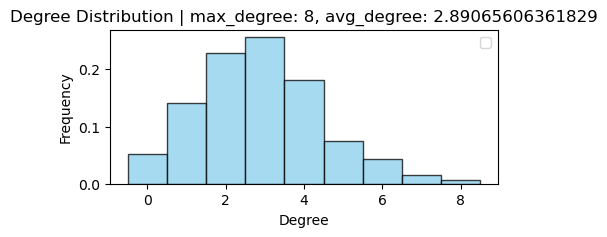

In [ ]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

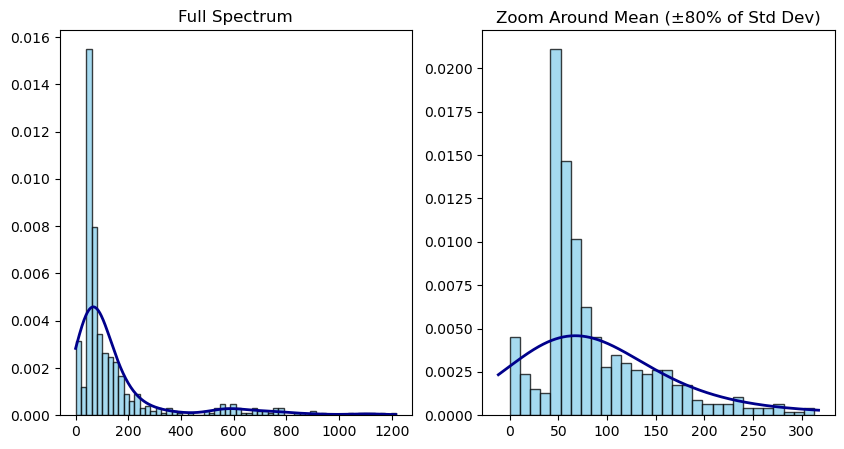

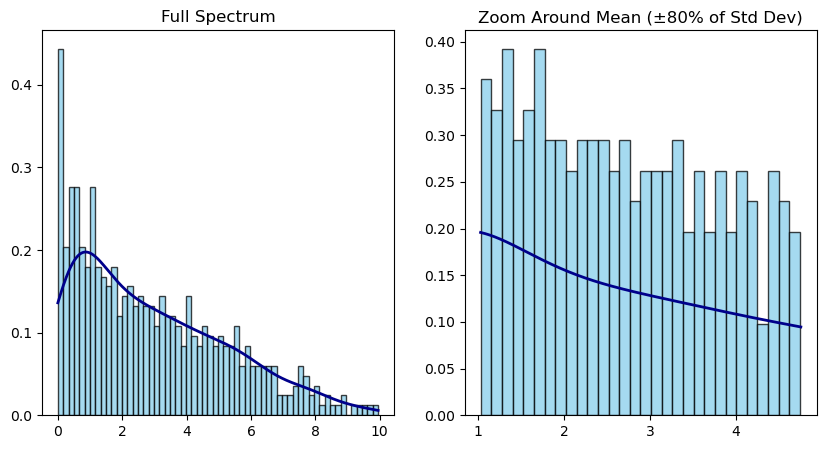

In [ ]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model selection

In [ ]:
import src.model_selection as ms 
real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


In [ ]:
np.pi